In [18]:
import numpy as np
from scipy.special import comb
#from numpy import linalg as LA
#from collections import deque
import matplotlib.pyplot as plt
#import matplotlib as mpl

#from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
#from mpl_toolkits.axes_grid1.inset_locator import inset_axes
#from IPython.display import set_matplotlib_formats
#from matplotlib import gridspec
#from matplotlib.legend import Legend
#import pandas as pd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#orange = ["#ff8c00"]
#blue = ["#4173b3"]
#green = ["#66cdaa"]
#red = ["#e85c47"]
#alpha = [0.5,0.4,0.3,0.2,0.1,0.0]
#beta = [0.9,0.8,0.6,0.4,0.2,0.1]
colors=["#ff8c00","#4173b3","#66cdaa","#e85c47","#ffffff","#000000","#ff5c47","#ff8c00","#4173b3","#66cdaa","#e85c47","#ffffff","#000000","#ff5c47"]

In [125]:
#Ndata=[3,4,5,6,7,8,9,10,11,12,13,14,15]   #V -3.250  -6.720   -2.260 4.670
Ndata=[6]
N=Ndata[0]

L=2*N
obdm=np.zeros([L, 1001])
obdminv=np.zeros([1001,L ])

FileName= f'obdmEDData/obdms_N{N:02d}/obdm_{L:02d}_{N:02d}_-1.500_+0.000_tstart+0.000_tend+100.000_tstep+0.100.dat'
data = np.loadtxt(FileName)
index = data[0,1]
obdmED = data[:,1]
obdm[0:N+1,:]=data[N-1::,1:]
obdm[N+1::,:]=(-1)**(N % 2-1)*data[0:N-1,1:]

#data[1,N-1::]

In [126]:
t=np.zeros(1001)
for ti in range(0,1001):
    t[ti]=ti*.1
    λ=np.zeros(L)
    if (N % 2==1):
        for q in range(0,N):
            for i in range(0,L):
                λ[N-1-q]+=obdm[i,ti]*np.cos((q+(1-N % 2)/2)*i*np.pi*2/L)
            if (0<q<N):
                λ[N+q-1]=λ[N-1-q]
        for i in range(0,L):
            λ[L-1]+=obdm[i,ti]*np.cos((N+(1-N % 2)/2)*i*np.pi*2/L)
    else:
        for q in range(0,N):
            for i in range(0,L):
                λ[N-1-q]+=obdm[i,ti]*np.cos((q+(1-N % 2)/2)*i*np.pi*2/L)
            λ[N+q]=λ[N-1-q]
    obdm[:,ti]=λ[:] 

In [127]:
for i in range(L):
    for j in range(1001):
        obdminv[j,i]=obdm[i,j]

In [128]:
obdmp=np.zeros([200,L])
obdmp[:,:]=(abs(obdminv[0:200,:]))

In [129]:
λ=np.zeros(L)
σ=np.zeros(L)
Sv=0.0
start=0
for i in range(L):
    λ[i]=np.sum(obdm[i,start:])/(1001-start)
    σ[i]=obdm[i,:].std()
    Sv-=λ[i]*np.log(λ[i])
Sv-np.log(N)

0.29167638627928616

<function matplotlib.pyplot.show>

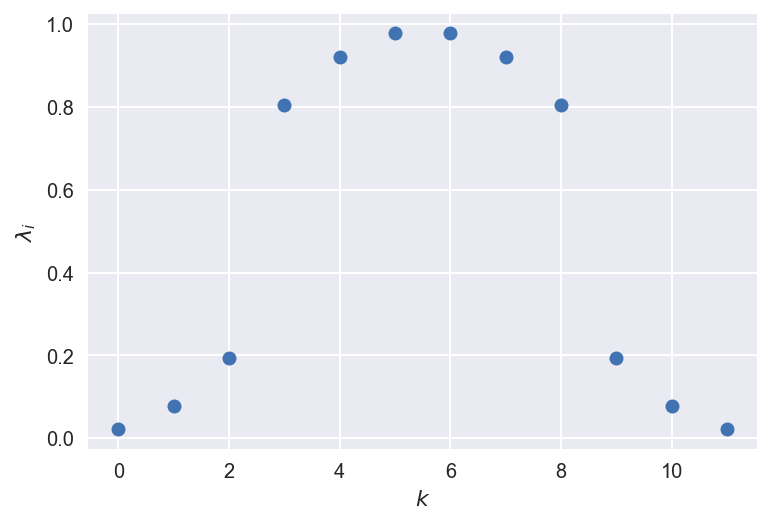

In [130]:
fig = plt.figure()
ax= fig.add_subplot(111)


ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$\lambda_i$')
ax.plot(λ*N,'o',c = colors[1], linewidth = 2,label=r'$Cyc_{\rm{tot}}(L,L)^{-1}$')


plt.show


<function matplotlib.pyplot.show>

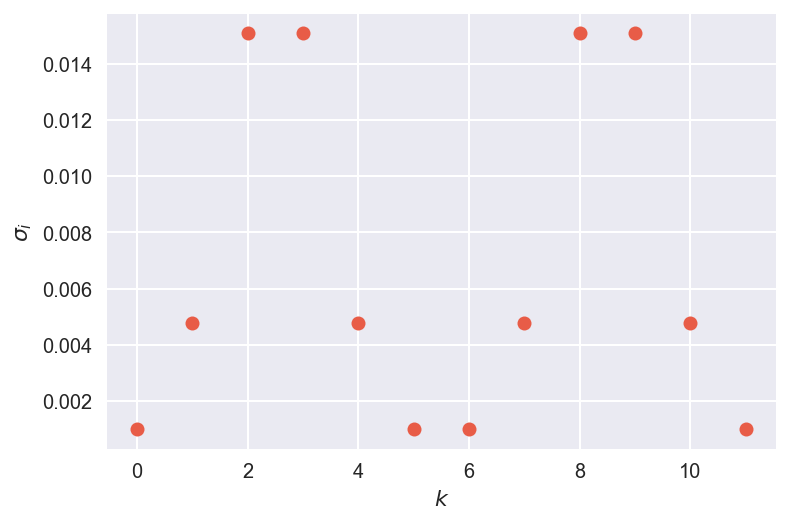

In [131]:
fig = plt.figure()
ax= fig.add_subplot(111)


ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$\sigma_i$')
ax.plot(σ,'o',c = colors[3], linewidth = 2,label=r'$Cyc_{\rm{tot}}(L,L)^{-1}$')


plt.show

<function matplotlib.pyplot.show>

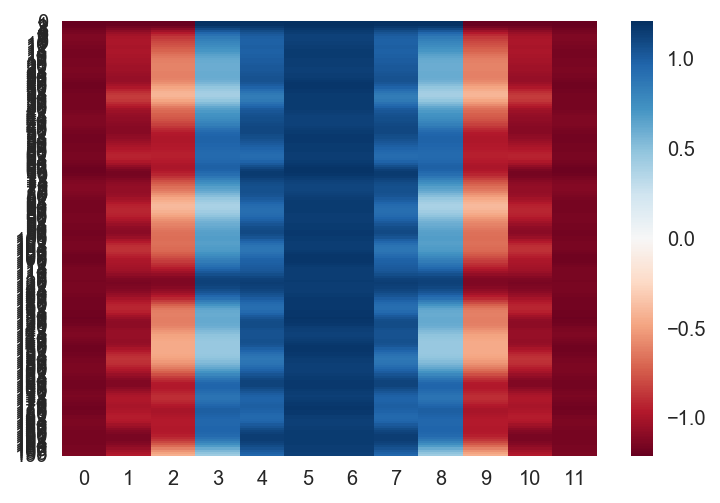

In [132]:
fig = plt.figure()    #spectral  gist_rainbow  RdBu Vega10 gray hot
ax= fig.add_subplot(111)
ax.set_xlabel(r'$i$')
ax.set_ylabel(r'$\lambda_i$')
Index1=np.arange(0,L)
Index2=np.arange(0,L)


df_norm_col=(obdmp-obdmp.mean())/obdmp.std()
sns.heatmap(df_norm_col, cmap='RdBu')
#plt.imshow(df_norm_col, cmap='RdBu')


plt.savefig('v-1.800.png',dpi=300, transparent=False)   
#viridis

plt.show

<function matplotlib.pyplot.show>

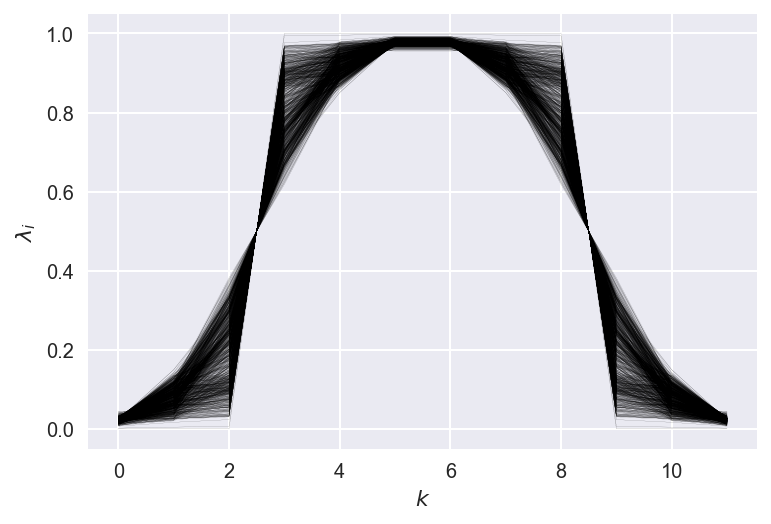

In [133]:
fig = plt.figure()
ax= fig.add_subplot(111)
for i in range(0,1001):
    ax.set_xlabel(r'$k$')
    ax.set_ylabel(r'$\lambda_i$')
    ax.plot(obdm[:,i]*N,'-',c = colors[5], linewidth = .05,label=r'$Cyc_{\rm{tot}}(L,L)^{-1}$')


plt.show



<function matplotlib.pyplot.show>

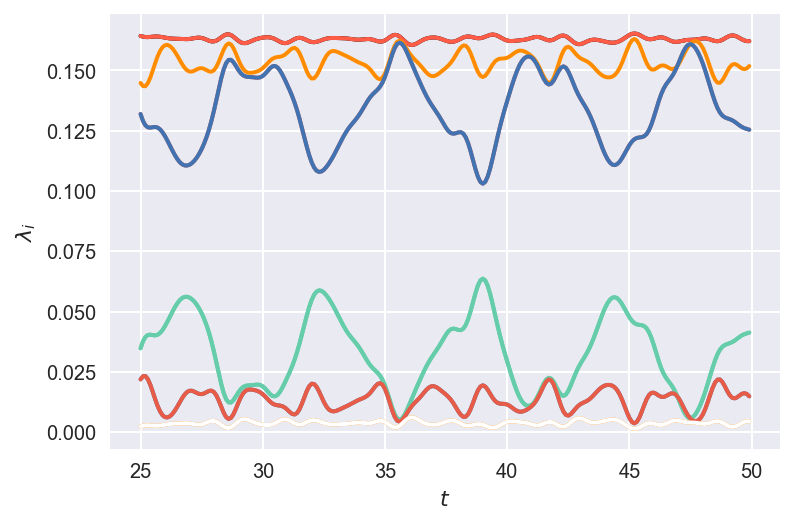

In [134]:
fig = plt.figure()
ax= fig.add_subplot(111)
for i in range(L):
    #fig = plt.figure()
    #ax= fig.add_subplot(111)
    t1=250
    t2=500
    ax.set_xlabel(r'$t$')
    ax.set_ylabel(r'$\lambda_i$')
    ax.plot(t[t1:t2],obdm[i,t1:t2],'-',c = colors[i], linewidth = 2,label=r'$Cyc_{\rm{tot}}(L,L)^{-1}$')
    #ax.plot(t[:],obdm[i,:]+obdm[L-1-i,:],'-',c = colors[i], linewidth = 2,label=r'$Cyc_{\rm{tot}}(L,L)^{-1}$')



plt.show


In [135]:
S1=np.zeros(1001)
for i in range(1001):
    for k in range(L):
        if obdm[k,i]>1e-14:
            S1[i]-=obdm[k,i]*np.log(obdm[k,i])


<function matplotlib.pyplot.show>

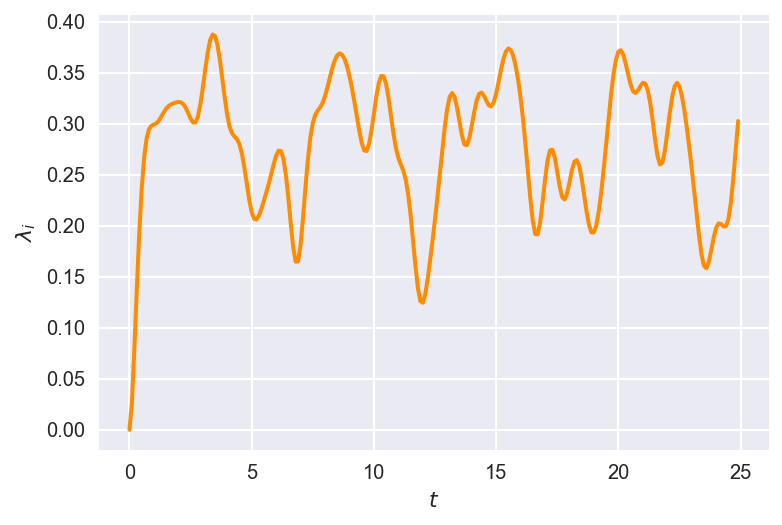

In [136]:
    fig = plt.figure()
    ax= fig.add_subplot(111)
    ax1= fig.add_subplot(111)
    t1=0 
    t2=250
    ax.set_xlabel(r'$t$')
    ax.set_ylabel(r'$\lambda_i$')
    ax.plot(t[t1:t2],S1[t1:t2]-np.log(N),'-',c = colors[0], linewidth = 2,label=r'$Cyc_{\rm{tot}}(L,L)^{-1}$')
    #ax.plot(t[:],obdm[i,:]+obdm[L-1-i,:],'-',c = colors[i], linewidth = 2,label=r'$Cyc_{\rm{tot}}(L,L)^{-1}$')



plt.show



In [137]:
Sλ=np.zeros([L,1001])
for k in range(L):
    for i in range(0,1001):
            for j in range(i):
                Sλ[k,i]+=obdm[k,j]
            if i>0:
                Sλ[k,i]/=(i)

<function matplotlib.pyplot.show>

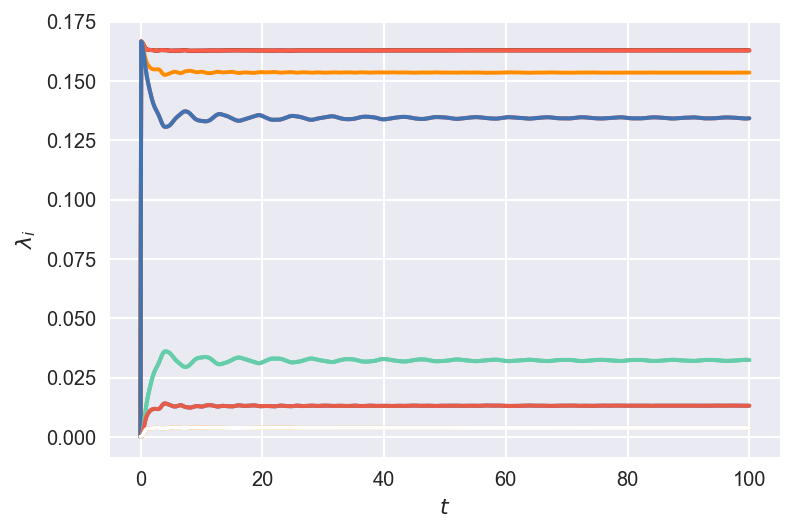

In [138]:
fig = plt.figure()
ax= fig.add_subplot(111)
for i in range(L):
    #fig = plt.figure()
    #ax= fig.add_subplot(111)
    t1=0 
    t2=1001
    ax.set_xlabel(r'$t$')
    ax.set_ylabel(r'$\lambda_i$')
    ax.plot(t[t1:t2],Sλ[i,t1:t2],'-',c = colors[i], linewidth = 2,label=r'$Cyc_{\rm{tot}}(L,L)^{-1}$')
    #ax.plot(t[:],obdm[i,:]+obdm[L-1-i,:],'-',c = colors[i], linewidth = 2,label=r'$Cyc_{\rm{tot}}(L,L)^{-1}$')



plt.show



In [139]:
S1=np.zeros(1001)
for i in range(1001):
    for k in range(L):
        if Sλ[k,i]>1e-14:
            S1[i]-=Sλ[k,i]*np.log(Sλ[k,i])



<function matplotlib.pyplot.show>

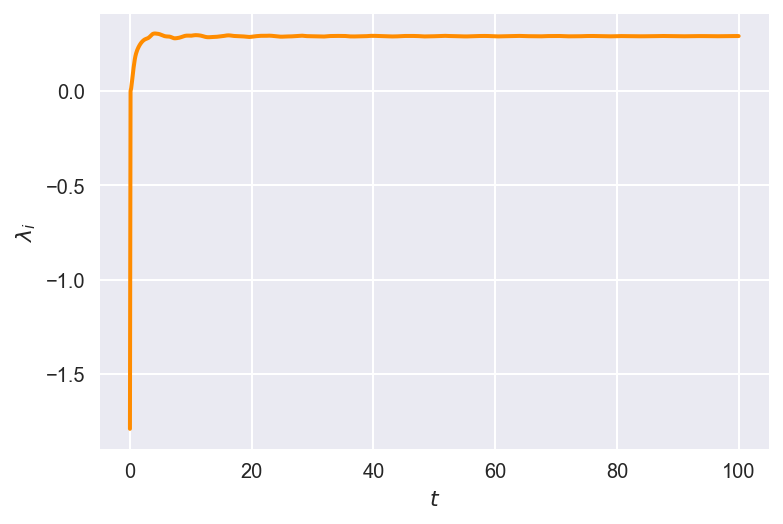

In [140]:
    fig = plt.figure()
    ax= fig.add_subplot(111)
    ax1= fig.add_subplot(111)
    t1=0 
    t2=1001
    ax.set_xlabel(r'$t$')
    ax.set_ylabel(r'$\lambda_i$')
    ax.plot(t[t1:t2],S1[t1:t2]-np.log(N),'-',c = colors[0], linewidth = 2,label=r'$Cyc_{\rm{tot}}(L,L)^{-1}$')
    #ax.plot(t[:],obdm[i,:]+obdm[L-1-i,:],'-',c = colors[i], linewidth = 2,label=r'$Cyc_{\rm{tot}}(L,L)^{-1}$')



plt.show